# SciKit-Learn - KNN, Linear Regression, Supervised Learning

- The intro to this video was all about the different kinds of approaches one can take when assessing a problem where you want to use machine learning.
- The type of model you use depends entirely on the question you're trying to answer or the problem you're trying to solve.
- In this lecture we use sklearn (SciKit-Learn) to predict a result.
- Documentation for sklearn can be found here: {{https://scikit-learn.org/stable/}}

- Sklearn has many types of machine learning algorithms already set up and ready to use.
- Each machine learning algorithm is a class in itself and we just have to initialize an object in python to use it.
- In sklearn, each algorithm is referred to as an "estimator".
- The super nice thing about sklearn is that even through there are many many different algorithms to choose from, their interface is practcally the same of all of them. 
    - Fit
    - Score
    - Predict

- model = LinearRegression(..........................)
    - In this example, we're referring to the linear regression model.
- model.fit(X, y)
    - Fit methods are for training your model.
    - When using the fit functions, we have to give it data as NumPy tables.
    - Each NumPy table must have 2 dimentions.
    - Normally, the X is a table with 2 variables.
    - The y table must also have 2 dimensions even though its output is still of a single dimension, the table should have a width of 1.
- model.score(X, y)
    - When the model is trained, we then need to evaluate the model with the score method.
    - We give the model input data as X to make a prediction.
    - The prediction is then compared to the values in y which are considered the correct values.
- model.predict(X)
    - When you're satisfied with your result from fit and score, you can then use your model to predict data that you don't know the value of with the predict method.
    - Note there is only an input X here.

- To use these classes/algorithms, just import the corresponding module from the sklearn library.
- Note, if you import sklearn all alone, the program will not work.
{{https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html}}

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Regression with SKLearn

In [3]:
np.random.seed(0)
m = 100 # Used for creating 100 random samples.
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

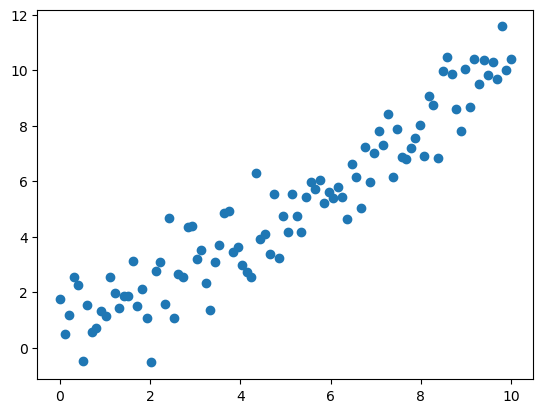

In [4]:
plt.scatter(X, y)

- First, we need to import the linear regression class which is located in the linear_model subpackage.
- To read up on more of the subpackages, look here: {{https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model}}

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.8881140743377214

- When we give our data to the linear regression model, we get back a score.
- This score is the coefficient of determination.
    - You can read more here: {{https://en.wikipedia.org/wiki/Coefficient_of_determination}}
    - And specificly if you want to read up on the return for the score function of the linear regression method: {{https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression}}
- Below we are going to use the X data to make a prediction and save the result in a prediction object.
- Then we're going to plot it on a plane with the input values.

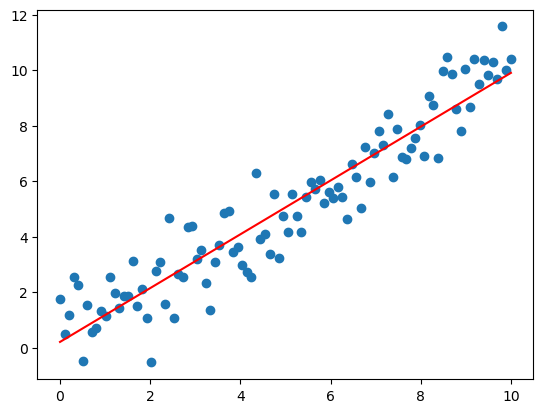

In [7]:
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r')

- Obviously this method only works for data where there is a linear relationship between the two axis.
- This will not work for data sets who have a quadratic or cubic relationship or indeed anything other than linear.

### Classification KNN with SKLearn

- For this example, we're going to use the data set of the titanic data like we've been using in the other problems.

In [8]:
import pandas as pd
titanic = pd.read_excel('titanic.xlsx')

- We're only keeping the survived, pclass, sex, and age data.
- We're dropping all the lines with empty data.
- We're replacing the words male/female with 0 and 1 respectively.

In [9]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
print(titanic.head())

   survived  pclass  sex      age
0         1       1    1  29.0000
1         1       1    0   0.9167
2         0       1    1   2.0000
3         0       1    0  30.0000
4         0       1    1  25.0000


- The first step is to load an algorithm for classification of data.
- We want this because we have have several discrete variables like plcass and sex.
- We also want to predict survivability.
- In this examples, we are going to use the K Neighbors classifier.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

- At this point, we need our two tables of data for our X and y input.
- We only have our single table though, so we need to divide this data set into 2 that we can use with our functions.

In [11]:
model = KNeighborsClassifier()
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [12]:
model.fit(X, y)
model.score(X, y)

0.8307839388145315

- Finally at this point, we have a model that is fitted with the data, and a score that works.
- We can now make a precition function and pass it data to make a prediction on whether or not it thinks we would survive the wreck of the titanic or not.
- Here we have 3 lines:
    - First we define our function which takes as the first argument the trained model we want to use with our data.
        - Then we have 3 keyword arguments for the data we want to give to the predict method: pclass, sex and age.
    - Second, we set create a new np.array with the values passed to the function.
        - In the same line, we take our (3, ) array and reshape it to (1, 3)
        - I also send the result of this array into a DataFrame and indicate the names of the columns; otherwise, the interpreter will send us a warning message.
    - Third we call the predict method and pass our array into it then print the return value.

In [13]:
def survive(model, pclass=3, sex=0, age=29):
    x = pd.DataFrame(np.array([pclass, sex, age]).reshape(1, 3), columns=['pclass', 'sex', 'age'])
    print(model.predict(x))
    print(model.predict_proba(x))

In [14]:
survive(model)
survive(model, 3, 1, 29)

[0]
[[0.6 0.4]]
[0]
[[0.8 0.2]]


In [15]:
results = np.zeros((10, 2))
for item in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=item)
    y = titanic['survived']
    X = titanic.drop('survived', axis=1)
    model.fit(X, y)
    results[item - 1, 0] = item
    results[item - 1, 1] = model.score(X, y)
print(results)

[[ 1.          0.81835564]
 [ 2.          0.82217973]
 [ 3.          0.83460803]
 [ 4.          0.82791587]
 [ 5.          0.83078394]
 [ 6.          0.82695985]
 [ 7.          0.82600382]
 [ 8.          0.80975143]
 [ 9.          0.80879541]
 [10.          0.79254302]]


In [17]:
print(results[results[:,1].argmax()])

[3.         0.83460803]
